# Dataset Mean & Standard Deviation Analysis

In [1]:
import pandas as pd
pd.read_csv('./result/dataset_analysis/mean_std_evaluation.csv', index_col=0)

,dataset,type,mean,standard deviaiton,dataset size
0,audio-mnist,train,[-53.371475 -53.371475 -53.371475],[19.25299 19.25299 19.25299],20000
1,audio-mnist,test,[-53.633068 -53.633068 -53.633068],[19.71607 19.71607 19.71607],10000
2,speech-commands,train,[-24.65672 -24.65672 -24.65672],[19.083237 19.083237 19.083237],51088
3,speech-commands,test,[-25.947584 -25.947584 -25.947584],[18.988497 18.988497 18.988497],6835
4,speech-commands,validation,[-27.331282 -27.331282 -27.331282],[18.743814 18.743814 18.743814],6798
5,speech-commands-random,train,[-24.644356 -24.644356 -24.644356],[19.172575 19.172575 19.172575],32185
6,speech-commands-random,test,[-26.143267 -26.143267 -26.143267],[19.172894 19.172894 19.172894],15326
7,speech-commands-random,validation,[-25.796955 -25.796955 -25.796955],[19.15897 19.15897 19.15897],3577


In [2]:
from lib.analysisUtils import load_records, TTA_Type, DatasetType

all_records = load_records({
    DatasetType.Audio_MINIST: {
        TTA_Type.TENT: './result/audio-mnist/tent/analysis',
        TTA_Type.TTT: './result/audio-mnist/ttt/time_shift_analysis',
        TTA_Type.CONMIX: './result/audio-mnist/CoNMix/analysis'
    },
    DatasetType.Speech_Commands: {
        TTA_Type.TENT: './result/speech-commands/tent/analysis',
        TTA_Type.TTT: './result/speech-commands/ttt/time_shift_analysis',
        TTA_Type.CONMIX: './result/speech-commands/CoNMix/analysis'
    },
    DatasetType.Speech_Command_Random: {
        TTA_Type.TENT: './result/speech-commands-random/tent/analysis',
        TTA_Type.TTT: './result/speech-commands-random/ttt/time_shift_analysis',
    }
})

# Guassian Noise

In [3]:
from lib.analysisUtils import analyze_guassian_noise
analyze_guassian_noise(all_records=all_records)

,TTA type,model,number of weight,dataset,origin (%),corrupted (0.005),adapted (0.005)
0,Tent Adaptation,RestNet50,25567042,Audio MNIST,95.560000,31.110000,84.68
1,Norm Adaptation,RestNet50,25567042,Audio MNIST,95.560000,31.110000,80.66
2,TTT,Transfer Learning,737005,Audio MNIST,93.520000,30.070000,40.62
3,CoNMix,R50+ViT-B_16,103687828,Audio MNIST,97.340000,72.420000,95.39
4,Tent Adaptation,RestNet50,25587062,Speech Commands,87.666423,68.544257,41.887345
5,Norm Adaptation,RestNet50,25587062,Speech Commands,87.666423,68.544257,34.162399
6,TTT,Transfer Learning,740481,Speech Commands,96.327725,95.610827,NaN
7,CoNMix,R50+ViT-B_16,103692988,Speech Commands,95.098756,93.782004,NaN
8,Tent Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,84.164165,89.136109
9,Norm Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,84.164165,85.79538


# Doing the Dishes

In [4]:
from lib.analysisUtils import analyze_background

analyze_background(noise_type='doing_the_dishes', all_records=all_records)

,TTA type,model,number of weight,dataset,origin (%),corrupted (10.0),adapted (10.0),corrupted (3.0),adapted (3.0)
0,Tent Adaptation,RestNet50,25567042,Audio MNIST,95.560000,32.140000,82.770000,14.500000,53.630000
1,Norm Adaptation,RestNet50,25567042,Audio MNIST,95.560000,32.140000,80.660000,14.500000,53.940000
2,TTT,Transfer Learning,737005,Audio MNIST,93.520000,33.530000,46.150000,12.890000,14.190000
3,CoNMix,R50+ViT-B_16,103687828,Audio MNIST,97.340000,58.570000,93.730000,34.330000,87.150000
4,Tent Adaptation,RestNet50,25587062,Speech Commands,87.666423,66.934894,22.677396,48.368691,17.249451
5,Norm Adaptation,RestNet50,25587062,Speech Commands,87.666423,66.934894,17.264082,48.368691,14.133138
6,TTT,Transfer Learning,740481,Speech Commands,96.327725,92.216533,90.826628,82.179956,80.073153
7,CoNMix,R50+ViT-B_16,103692988,Speech Commands,95.098756,88.485735,91.514265,76.225311,85.530358
8,Tent Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,73.319849,81.730393,54.926269,66.481796
9,Norm Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,73.319849,77.032494,54.926269,60.341903


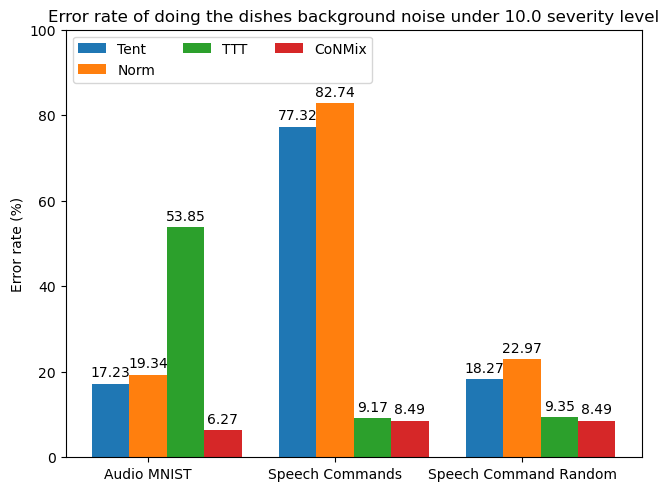

In [5]:
from lib.analysisUtils import error_rate_analysis

result = {
    'Tent': (100-82.77, 100-22.68, 100-81.73),
    'Norm': (100-80.66, 100-17.26, 100-77.03),
    'TTT': (100-46.15, 100-90.83, 100-90.65),
    'CoNMix': (100-93.73, 100-91.51, 100-91.51)
}

error_rate_analysis(result=result, datasets=['Audio MNIST', 'Speech Commands', 'Speech Command Random'], title='Error rate of doing the dishes background noise under 10.0 severity level')

# Exercise bike

In [6]:
analyze_background(noise_type='exercise_bike', all_records=all_records)

,TTA type,model,number of weight,dataset,origin (%),corrupted (10.0),adapted (10.0),corrupted (3.0),adapted (3.0)
0,Tent Adaptation,RestNet50,25567042,Audio MNIST,95.560000,30.600000,87.560000,19.360000,66.370000
1,Norm Adaptation,RestNet50,25567042,Audio MNIST,95.560000,30.600000,84.370000,19.360000,64.080000
2,TTT,Transfer Learning,737005,Audio MNIST,93.520000,44.640000,48.540000,10.800000,10.190000
3,CoNMix,R50+ViT-B_16,103687828,Audio MNIST,97.340000,49.700000,94.690000,29.910000,84.990000
4,Tent Adaptation,RestNet50,25587062,Speech Commands,87.666423,62.472568,20.804682,48.002926,16.517922
5,Norm Adaptation,RestNet50,25587062,Speech Commands,87.666423,62.472568,16.122897,48.002926,13.796635
6,TTT,Transfer Learning,740481,Speech Commands,96.327725,91.470373,89.144111,84.330651,78.361375
7,CoNMix,R50+ViT-B_16,103692988,Speech Commands,95.098756,87.812729,91.675201,77.234821,85.866862
8,Tent Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,66.697116,80.223150,51.520292,65.731437
9,Norm Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,66.697116,73.587368,51.520292,58.573666


# Running tap

In [7]:
analyze_background(noise_type='running_tap', all_records=all_records)

,TTA type,model,number of weight,dataset,origin (%),corrupted (10.0),adapted (10.0),corrupted (3.0),adapted (3.0)
0,Tent Adaptation,RestNet50,25567042,Audio MNIST,95.560000,32.660000,87.490000,28.770000,71.180000
1,Norm Adaptation,RestNet50,25567042,Audio MNIST,95.560000,32.660000,85.410000,28.770000,66.970000
2,TTT,Transfer Learning,737005,Audio MNIST,93.520000,46.020000,48.560000,14.810000,19.940000
3,CoNMix,R50+ViT-B_16,103687828,Audio MNIST,97.340000,48.550000,94.630000,28.100000,87.250000
4,Tent Adaptation,RestNet50,25587062,Speech Commands,87.666423,65.515728,21.068032,56.532553,17.878566
5,Norm Adaptation,RestNet50,25587062,Speech Commands,87.666423,65.515728,16.693489,56.532553,13.972202
6,TTT,Transfer Learning,740481,Speech Commands,96.327725,91.997074,90.797366,86.130212,83.072421
7,CoNMix,R50+ViT-B_16,103692988,Speech Commands,95.098756,88.105340,91.967813,81.492319,87.768837
8,Tent Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,68.993867,81.260603,58.886859,70.905651
9,Norm Adaptation,RestNet50,25587062,Random Speech Commands,91.993997,68.993867,75.362130,58.886859,64.530863
